In [14]:
# This code is from Superpoint[https://github.com/rpautrat/SuperPoint]

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob as glob
from superpoint.settings import EXPER_PATH
import superpoint.evaluations.detector_evaluation as ev
from utils import plot_imgs
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
def draw_keypoints(img, corners, color, radius=3, s=3):
    img = np.repeat(cv2.resize(img, None, fx=s, fy=s)[..., np.newaxis], 3, -1)
    for c in np.stack(corners).T:
        cv2.circle(img, tuple(s*np.flip(c, 0)), radius, color, thickness=-1)
    return img
def select_top_k(prob, thresh=0, num=300):    
    pts = np.where(prob > thresh)
    idx = np.argsort(prob[pts])[::-1][:num]
    pts = (pts[0][idx], pts[1][idx])
    return pts

# HPatches Viewpoint

In [16]:
experiments = [
    'magicpoint_syn_v_repeatability_nms_4',
    'magicpoint_syn_v_repeatability_nms_8',
    'magicpoint_COCO_v_repeatability_nms_4'
]
confidence_thresholds = [0.001, 0.001,0.001]

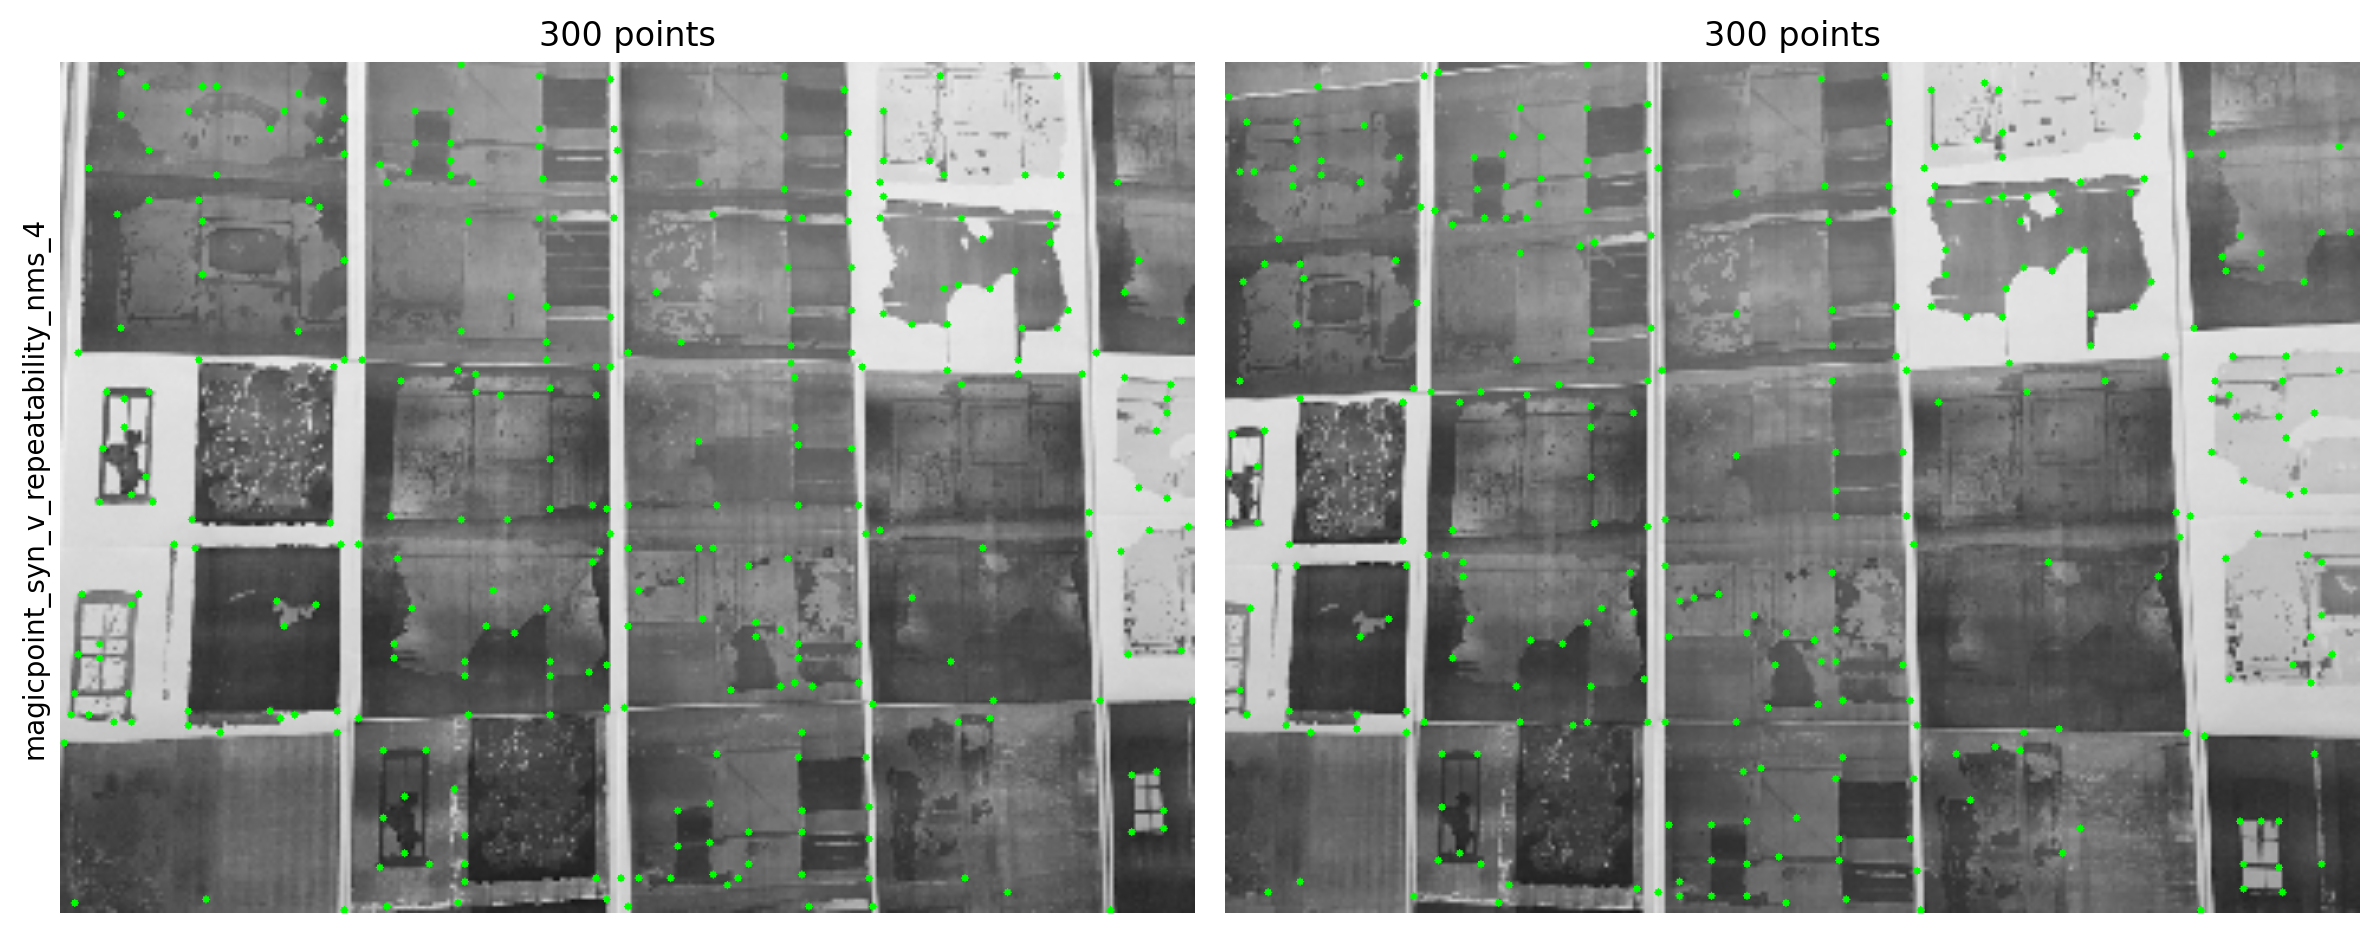

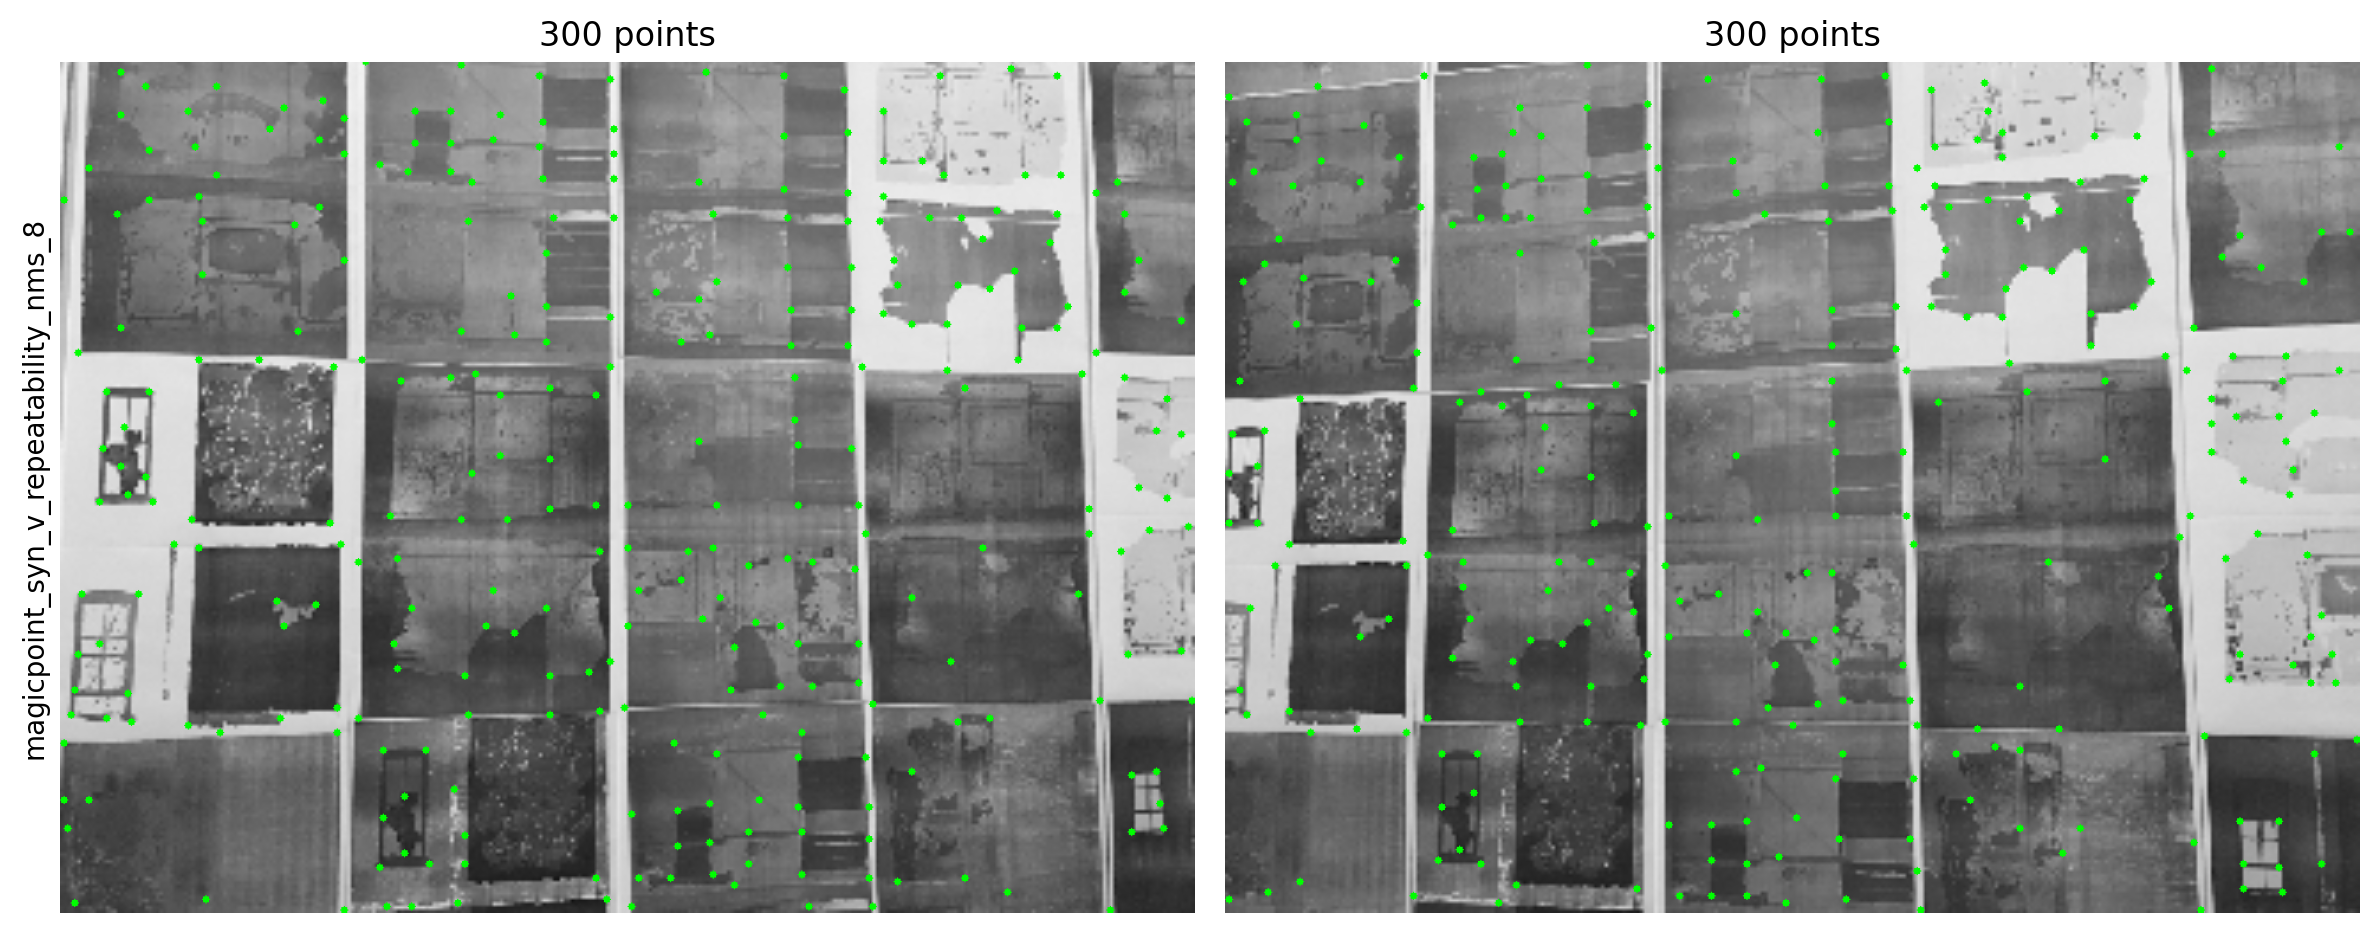

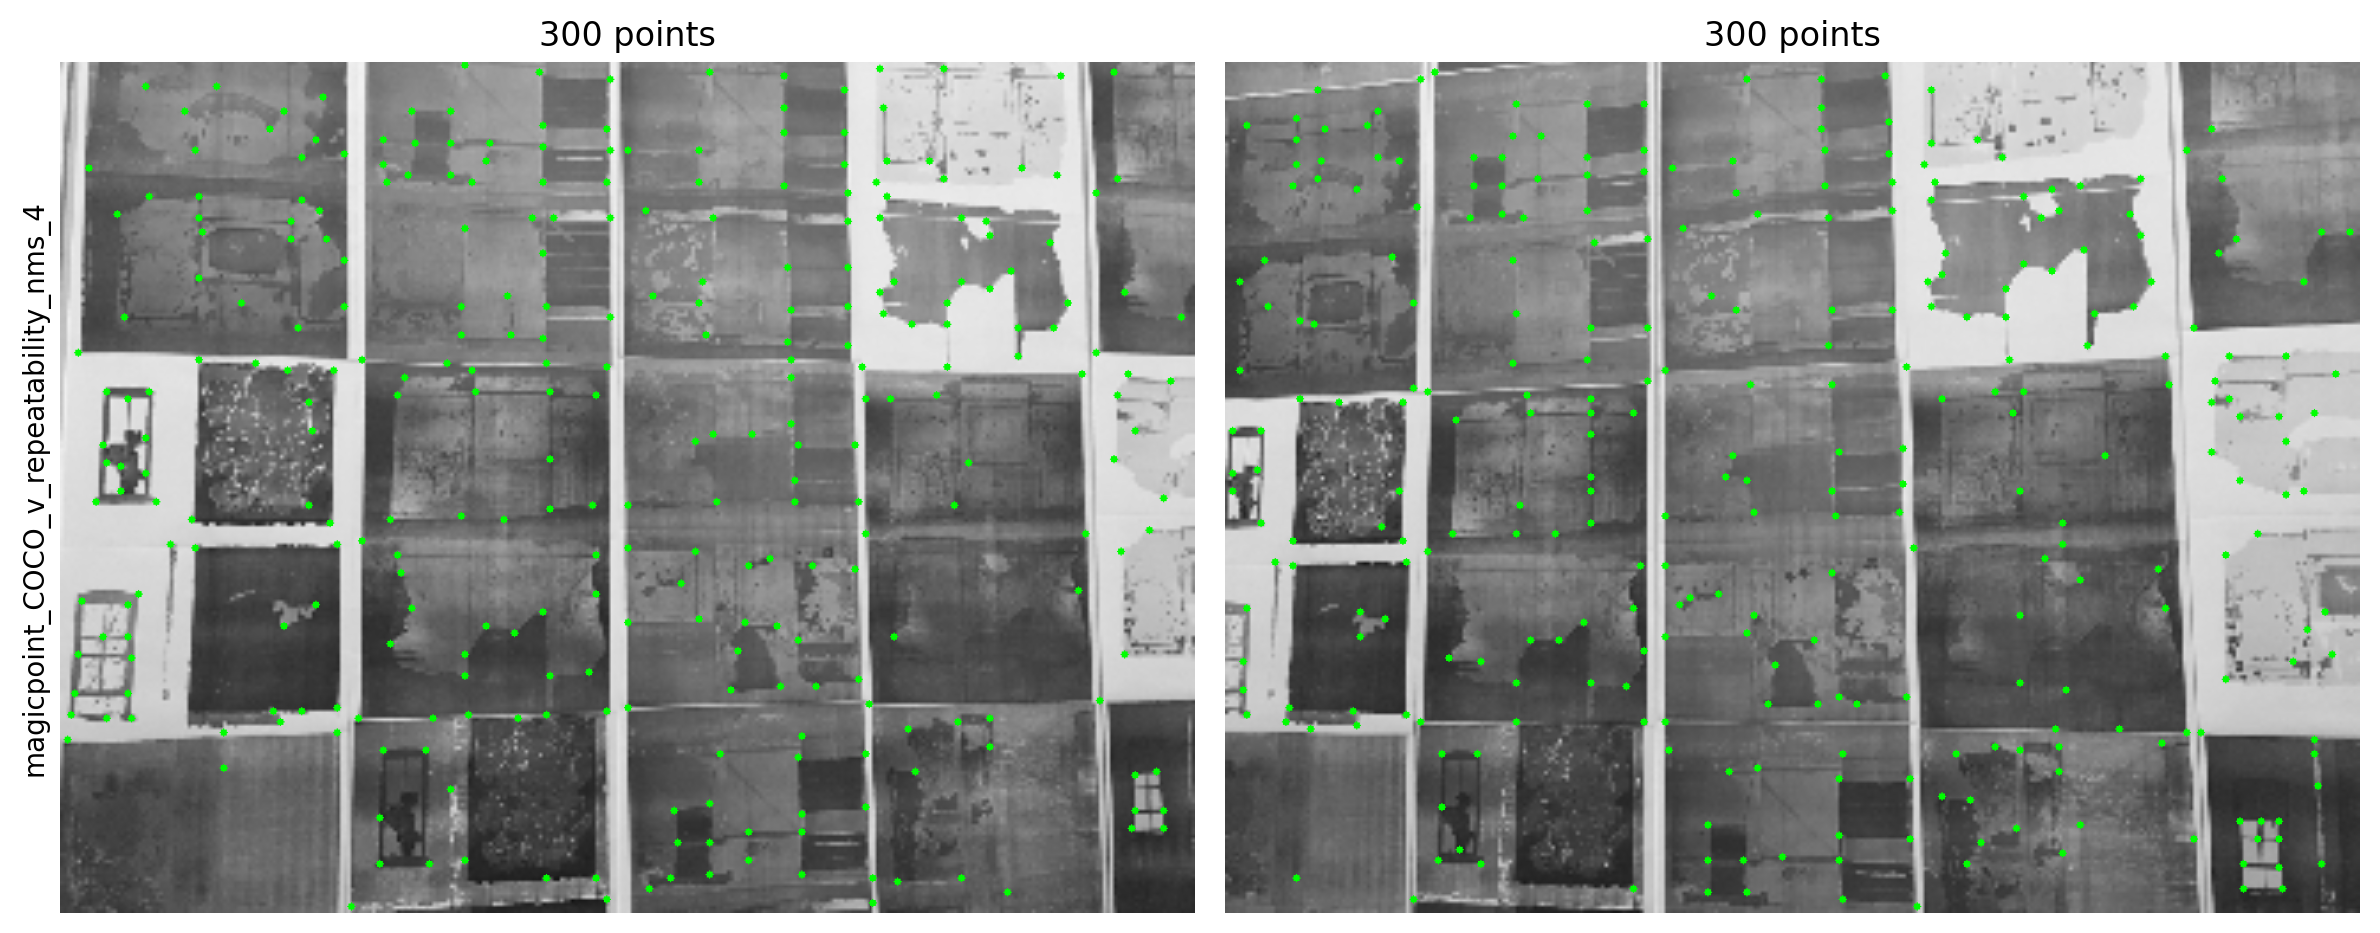

In [17]:
for i in range(1):
    for e, thresh in zip(experiments, confidence_thresholds):
        path = Path(EXPER_PATH, "repeatability", e)
        path = glob.glob(str(path)+ "/*.npz")[0]

        d = np.load(path)
        points1 = select_top_k(d['prob'], thresh=thresh)
        im1 = draw_keypoints(d['image'] * 255, points1, (0, 255, 0)) / 255.
        
        points2 = select_top_k(d['warped_prob'], thresh=thresh)
        im2 = draw_keypoints(d['warped_image'] * 255, points2, (0, 255, 0)) / 255.

        plot_imgs([im1, im2], ylabel=e, dpi=200, cmap='gray',
                  titles=[str(len(points1[0]))+' points', str(len(points2[0]))+' points'])

In [18]:
for exp in experiments:
    repeatability = ev.compute_repeatability(exp, keep_k_points=300, distance_thresh=3, verbose=False)
    print('> {}: {}'.format(exp, repeatability))

> magicpoint_syn_v_repeatability_nms_4: 0.5993683990717951
> magicpoint_syn_v_repeatability_nms_8: 0.5560105132467832
> magicpoint_COCO_v_repeatability_nms_4: 0.6567213940986899


# HPatches Illumination

In [19]:
experiments = [
    'magicpoint_syn_i_repeatability_nms_4',
    'magicpoint_syn_i_repeatability_nms_8',
    'magicpoint_COCO_i_repeatability_nms_4'
]
confidence_thresholds = [0.001, 0.001,0.001]

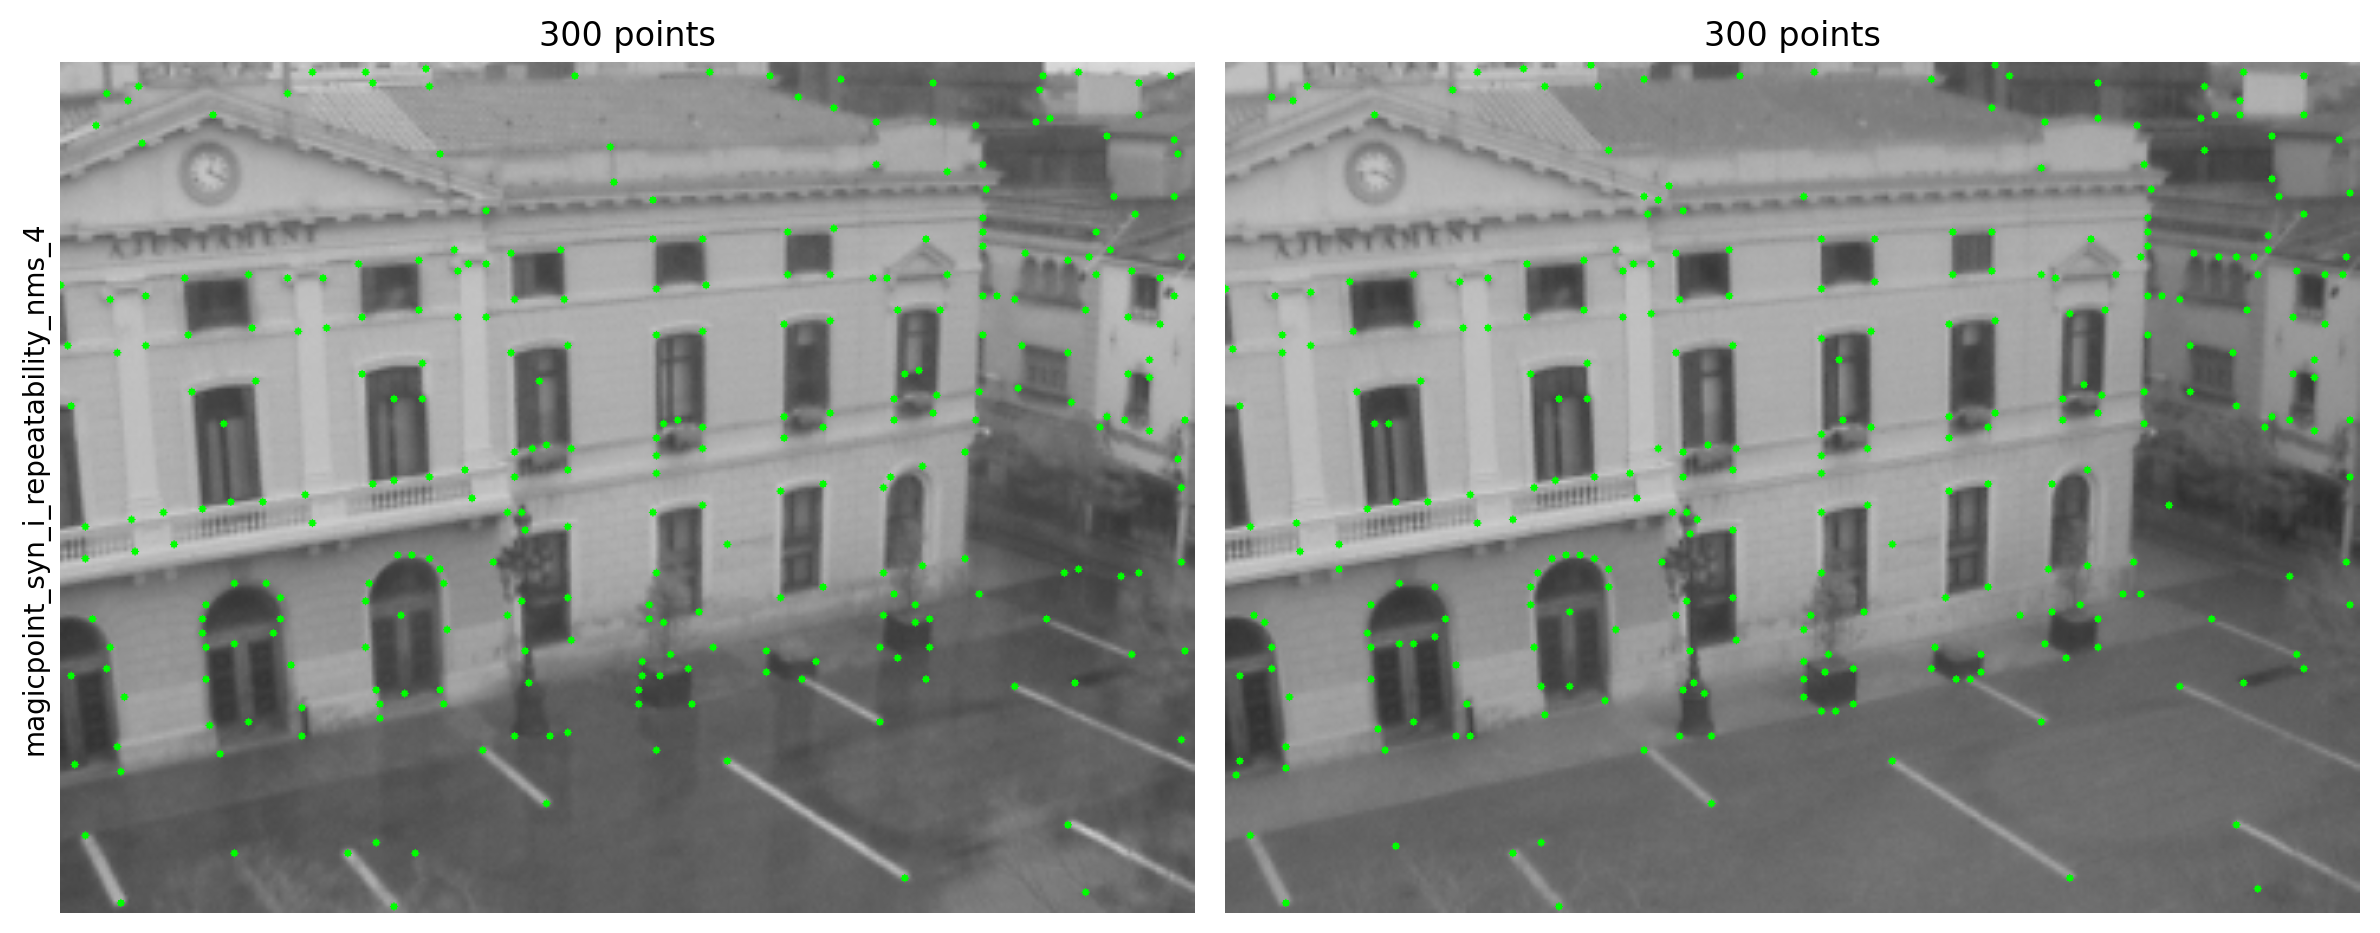

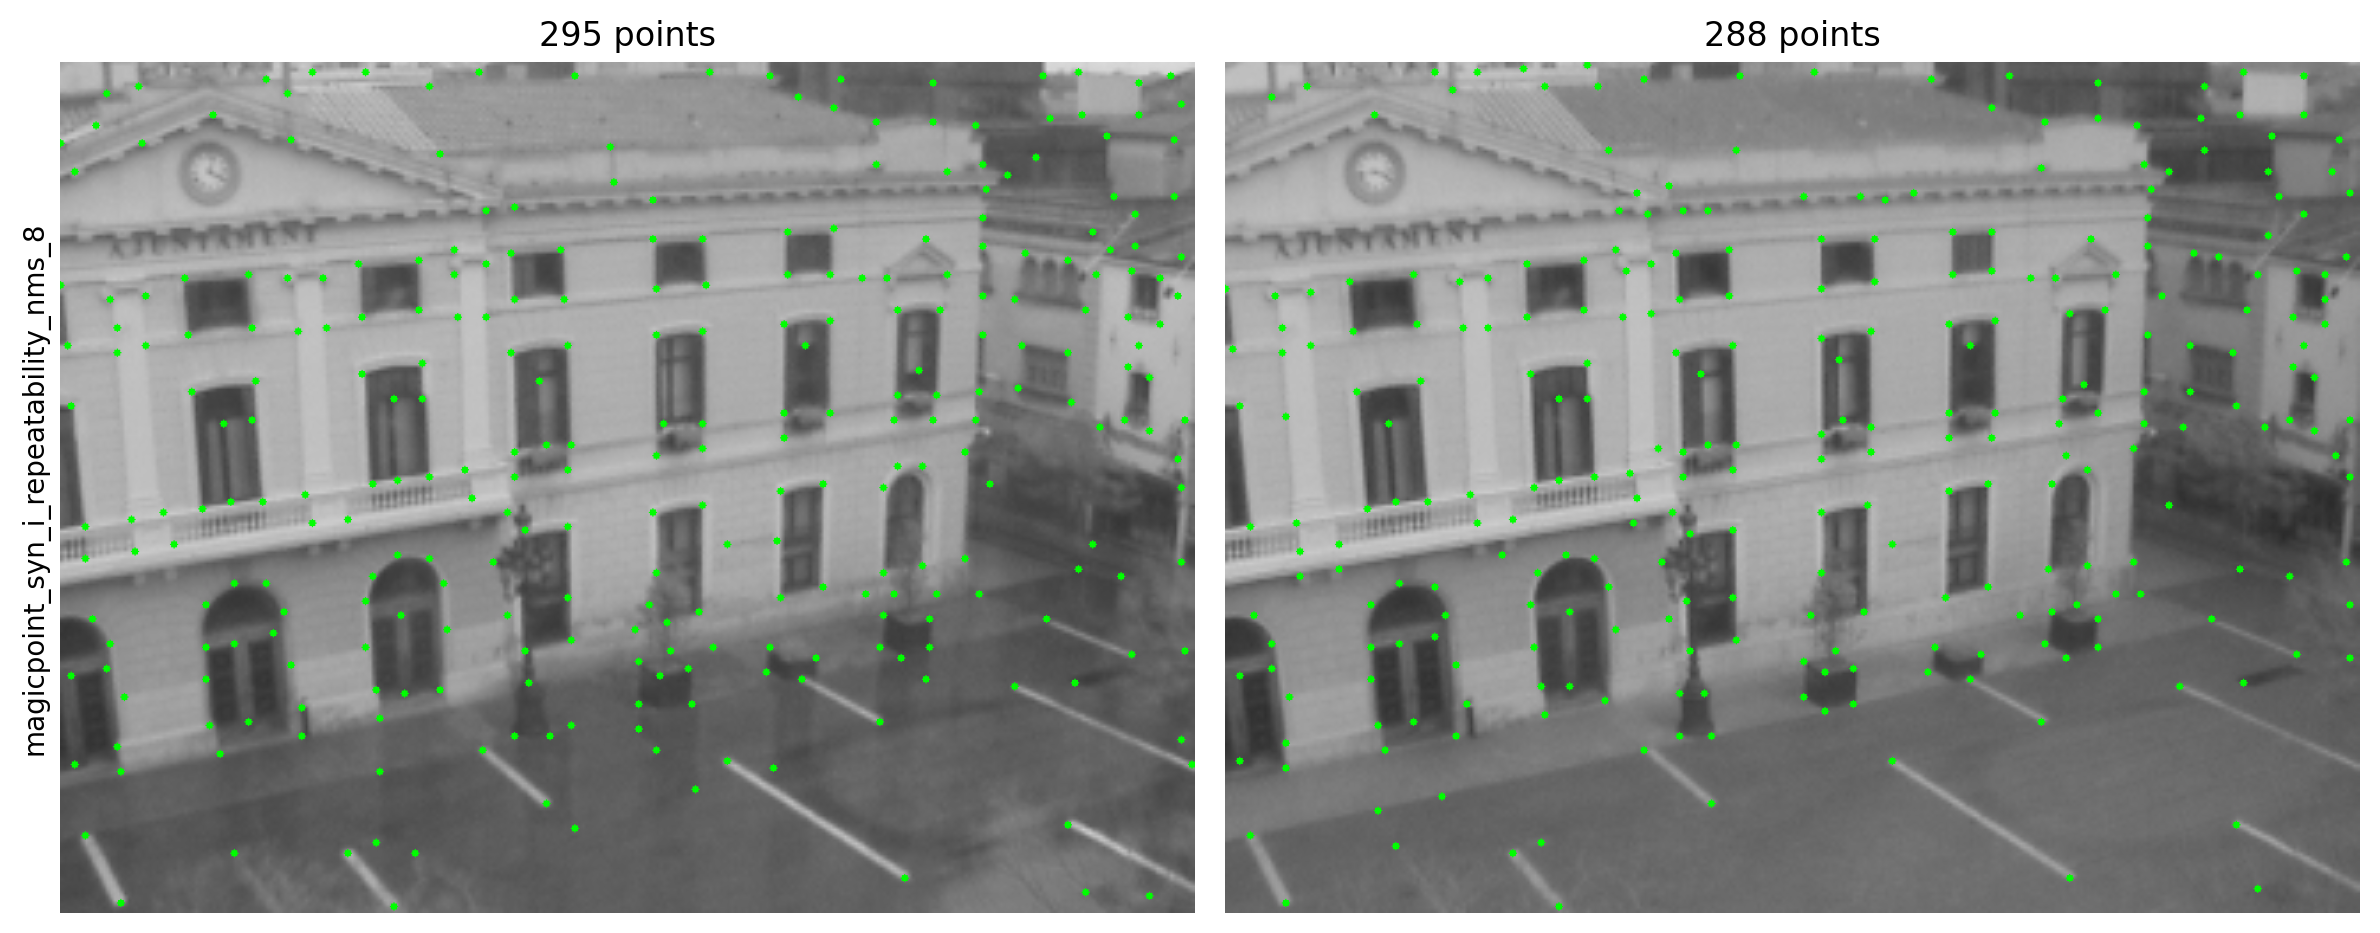

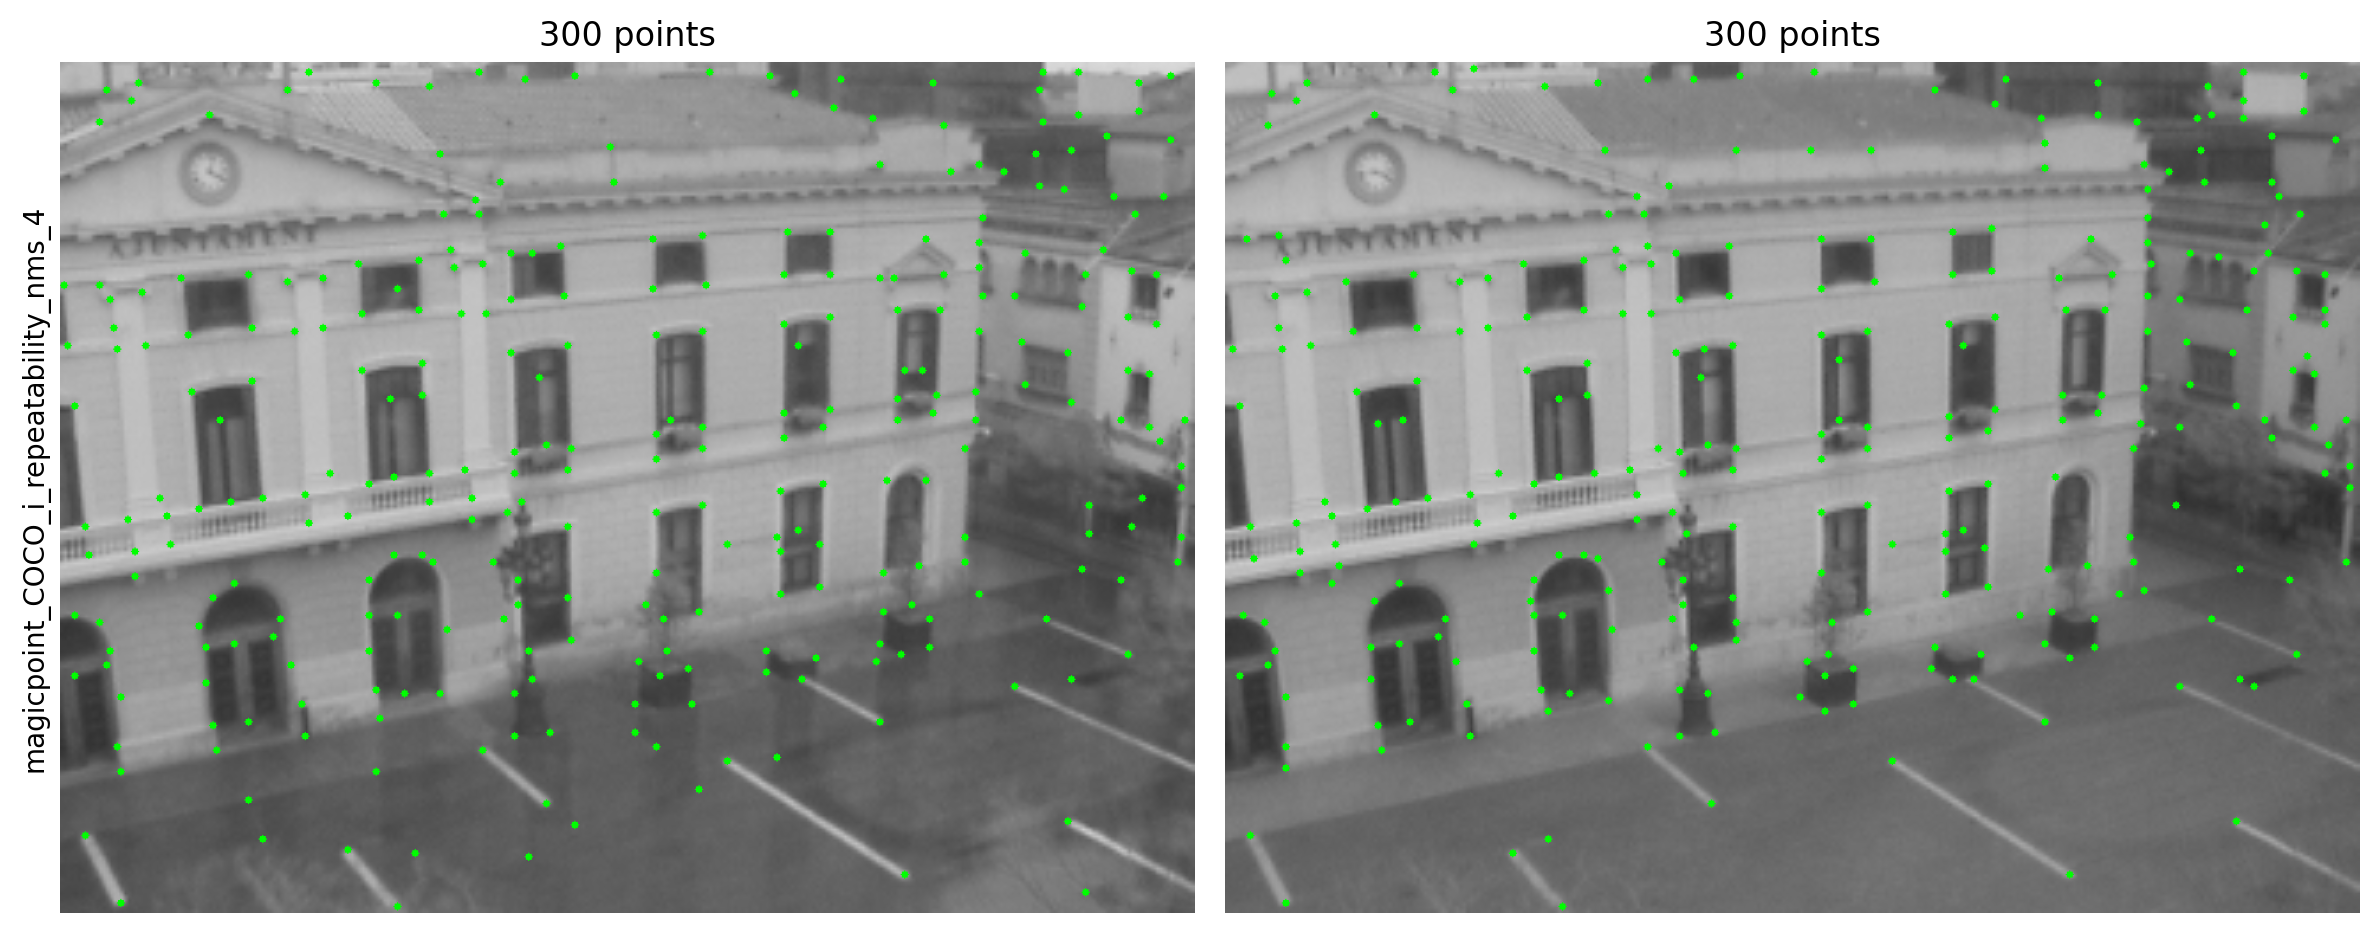

In [20]:
for i in range(1):
    for e, thresh in zip(experiments, confidence_thresholds):
        path = Path(EXPER_PATH, "repeatability", e)
        path = glob.glob(str(path)+ "/*.npz")[0]

        d = np.load(path)

        points1 = select_top_k(d['prob'], thresh=thresh)
        im1 = draw_keypoints(d['image'] * 255, points1, (0, 255, 0)) / 255.
        
        points2 = select_top_k(d['warped_prob'], thresh=thresh)
        im2 = draw_keypoints(d['warped_image'] * 255, points2, (0, 255, 0)) / 255.

        plot_imgs([im1, im2], ylabel=e, dpi=200, cmap='gray',
                  titles=[str(len(points1[0]))+' points', str(len(points2[0]))+' points'])

In [21]:
for exp in experiments:
    repeatability = ev.compute_repeatability(exp, keep_k_points=300, distance_thresh=3, verbose=False)
    print('> {}: {}'.format(exp, repeatability))

> magicpoint_syn_i_repeatability_nms_4: 0.6079943031937562
> magicpoint_syn_i_repeatability_nms_8: 0.5868569050558772
> magicpoint_COCO_i_repeatability_nms_4: 0.6530990296501857
